In [216]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.lda import LDA
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

In [3]:
stock = pd.read_excel("Stock_Data_Perf.xlsx")

In [4]:
avrg = stock.iloc[:, 1::8]

In [5]:
perc = pd.DataFrame([x for x in range(len(avrg)-1)])

In [6]:
for x in range(0, len(perc)-1):    
    perc = perc.join(avrg.iloc[:, x:x+1].pct_change(), how="inner")


In [7]:
del perc[0]

In [8]:
pct_change = perc

In [9]:
pct_change.fillna(value=0, inplace=True)

In [10]:
pct_change.head()

,Avrg_MMM,Avrg_ABT,Avrg_ABBV,Avrg_ACN,Avrg_ATVI,Avrg_AYI,Avrg_ADBE,Avrg_AAP,Avrg_AES,Avrg_AET,...,Avrg_XEL,Avrg_XRX,Avrg_XLNX,Avrg_XL,Avrg_XYL,Avrg_YHOO,Avrg_YUM,Avrg_ZBH,Avrg_ZION,Avrg_ZTS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,-0.014469,-0.002747,-0.012602,-0.017170,-0.008606,-0.019809,-0.006697,-0.015363,-0.017857,-0.013259,...,-0.002328,-0.021696,-0.008900,-0.000871,-0.043141,-0.016815,-0.015173,0.0,-0.025278,-0.003745
2,-0.013130,-0.007288,-0.005420,-0.008478,-0.015822,-0.018667,-0.012943,-0.008828,-0.022356,0.000282,...,0.002769,-0.015154,-0.015643,0.010684,-0.026531,-0.004858,-0.016488,0.0,-0.037570,-0.008387
3,0.000526,0.002130,-0.051352,0.216648,-0.018302,0.010167,0.270513,0.017692,-0.115218,0.279313,...,0.054155,-0.220814,0.114056,0.038580,0.145424,-0.217830,0.015364,0.0,0.101106,0.105633
4,0.014978,0.015967,0.105428,-0.154528,-0.001487,0.025968,-0.201226,0.021904,0.133761,-0.187620,...,-0.036960,0.316865,-0.094348,-0.021775,-0.117136,0.287400,0.023125,0.0,-0.088800,-0.062015


In [11]:
corr = pct_change.corr()

In [24]:
corr.head()

,Avrg_MMM,Avrg_ABT,Avrg_ABBV,Avrg_ACN,Avrg_ATVI,Avrg_AYI,Avrg_ADBE,Avrg_AAP,Avrg_AES,Avrg_AET,...,Avrg_XEL,Avrg_XRX,Avrg_XLNX,Avrg_XL,Avrg_XYL,Avrg_YHOO,Avrg_YUM,Avrg_ZBH,Avrg_ZION,Avrg_ZTS
Avrg_MMM,1.000000,0.437284,0.208254,0.189038,0.236210,0.370529,0.141699,0.305690,0.305993,0.108235,...,0.180049,0.178099,0.223434,0.350603,0.235734,0.196207,0.330346,0.255558,0.267195,0.193068
Avrg_ABT,0.437284,1.000000,0.392263,0.159294,0.267160,0.351291,0.173972,0.333119,0.261088,0.161198,...,0.123491,0.130262,0.226348,0.371378,0.164221,0.217989,0.315955,0.443931,0.230322,0.303349
Avrg_ABBV,0.208254,0.392263,1.000000,-0.275109,-0.126807,0.033149,-0.276401,0.296196,0.483440,-0.133275,...,-0.381264,0.310486,-0.109016,0.258609,-0.239137,0.500390,0.161767,0.302018,0.028904,0.221910
Avrg_ACN,0.189038,0.159294,-0.275109,1.000000,0.246532,0.251756,0.920508,0.081262,-0.512995,0.860700,...,0.388160,-0.654793,0.730768,0.267067,0.827711,-0.624903,0.136985,0.149683,0.691461,0.594785
Avrg_ATVI,0.236210,0.267160,-0.126807,0.246532,1.000000,0.445938,0.297679,0.062880,-0.127662,0.081908,...,0.487425,0.066553,0.320222,0.100597,0.335887,0.127891,0.216231,0.259779,0.033089,0.167839


In [12]:
data = corr.values

In [13]:
pca = PCA(n_components=len(corr)-1)

In [14]:
data_r = pca.fit(data).transform(data)

In [15]:
labels = [x for x in pct_change.head(0)]

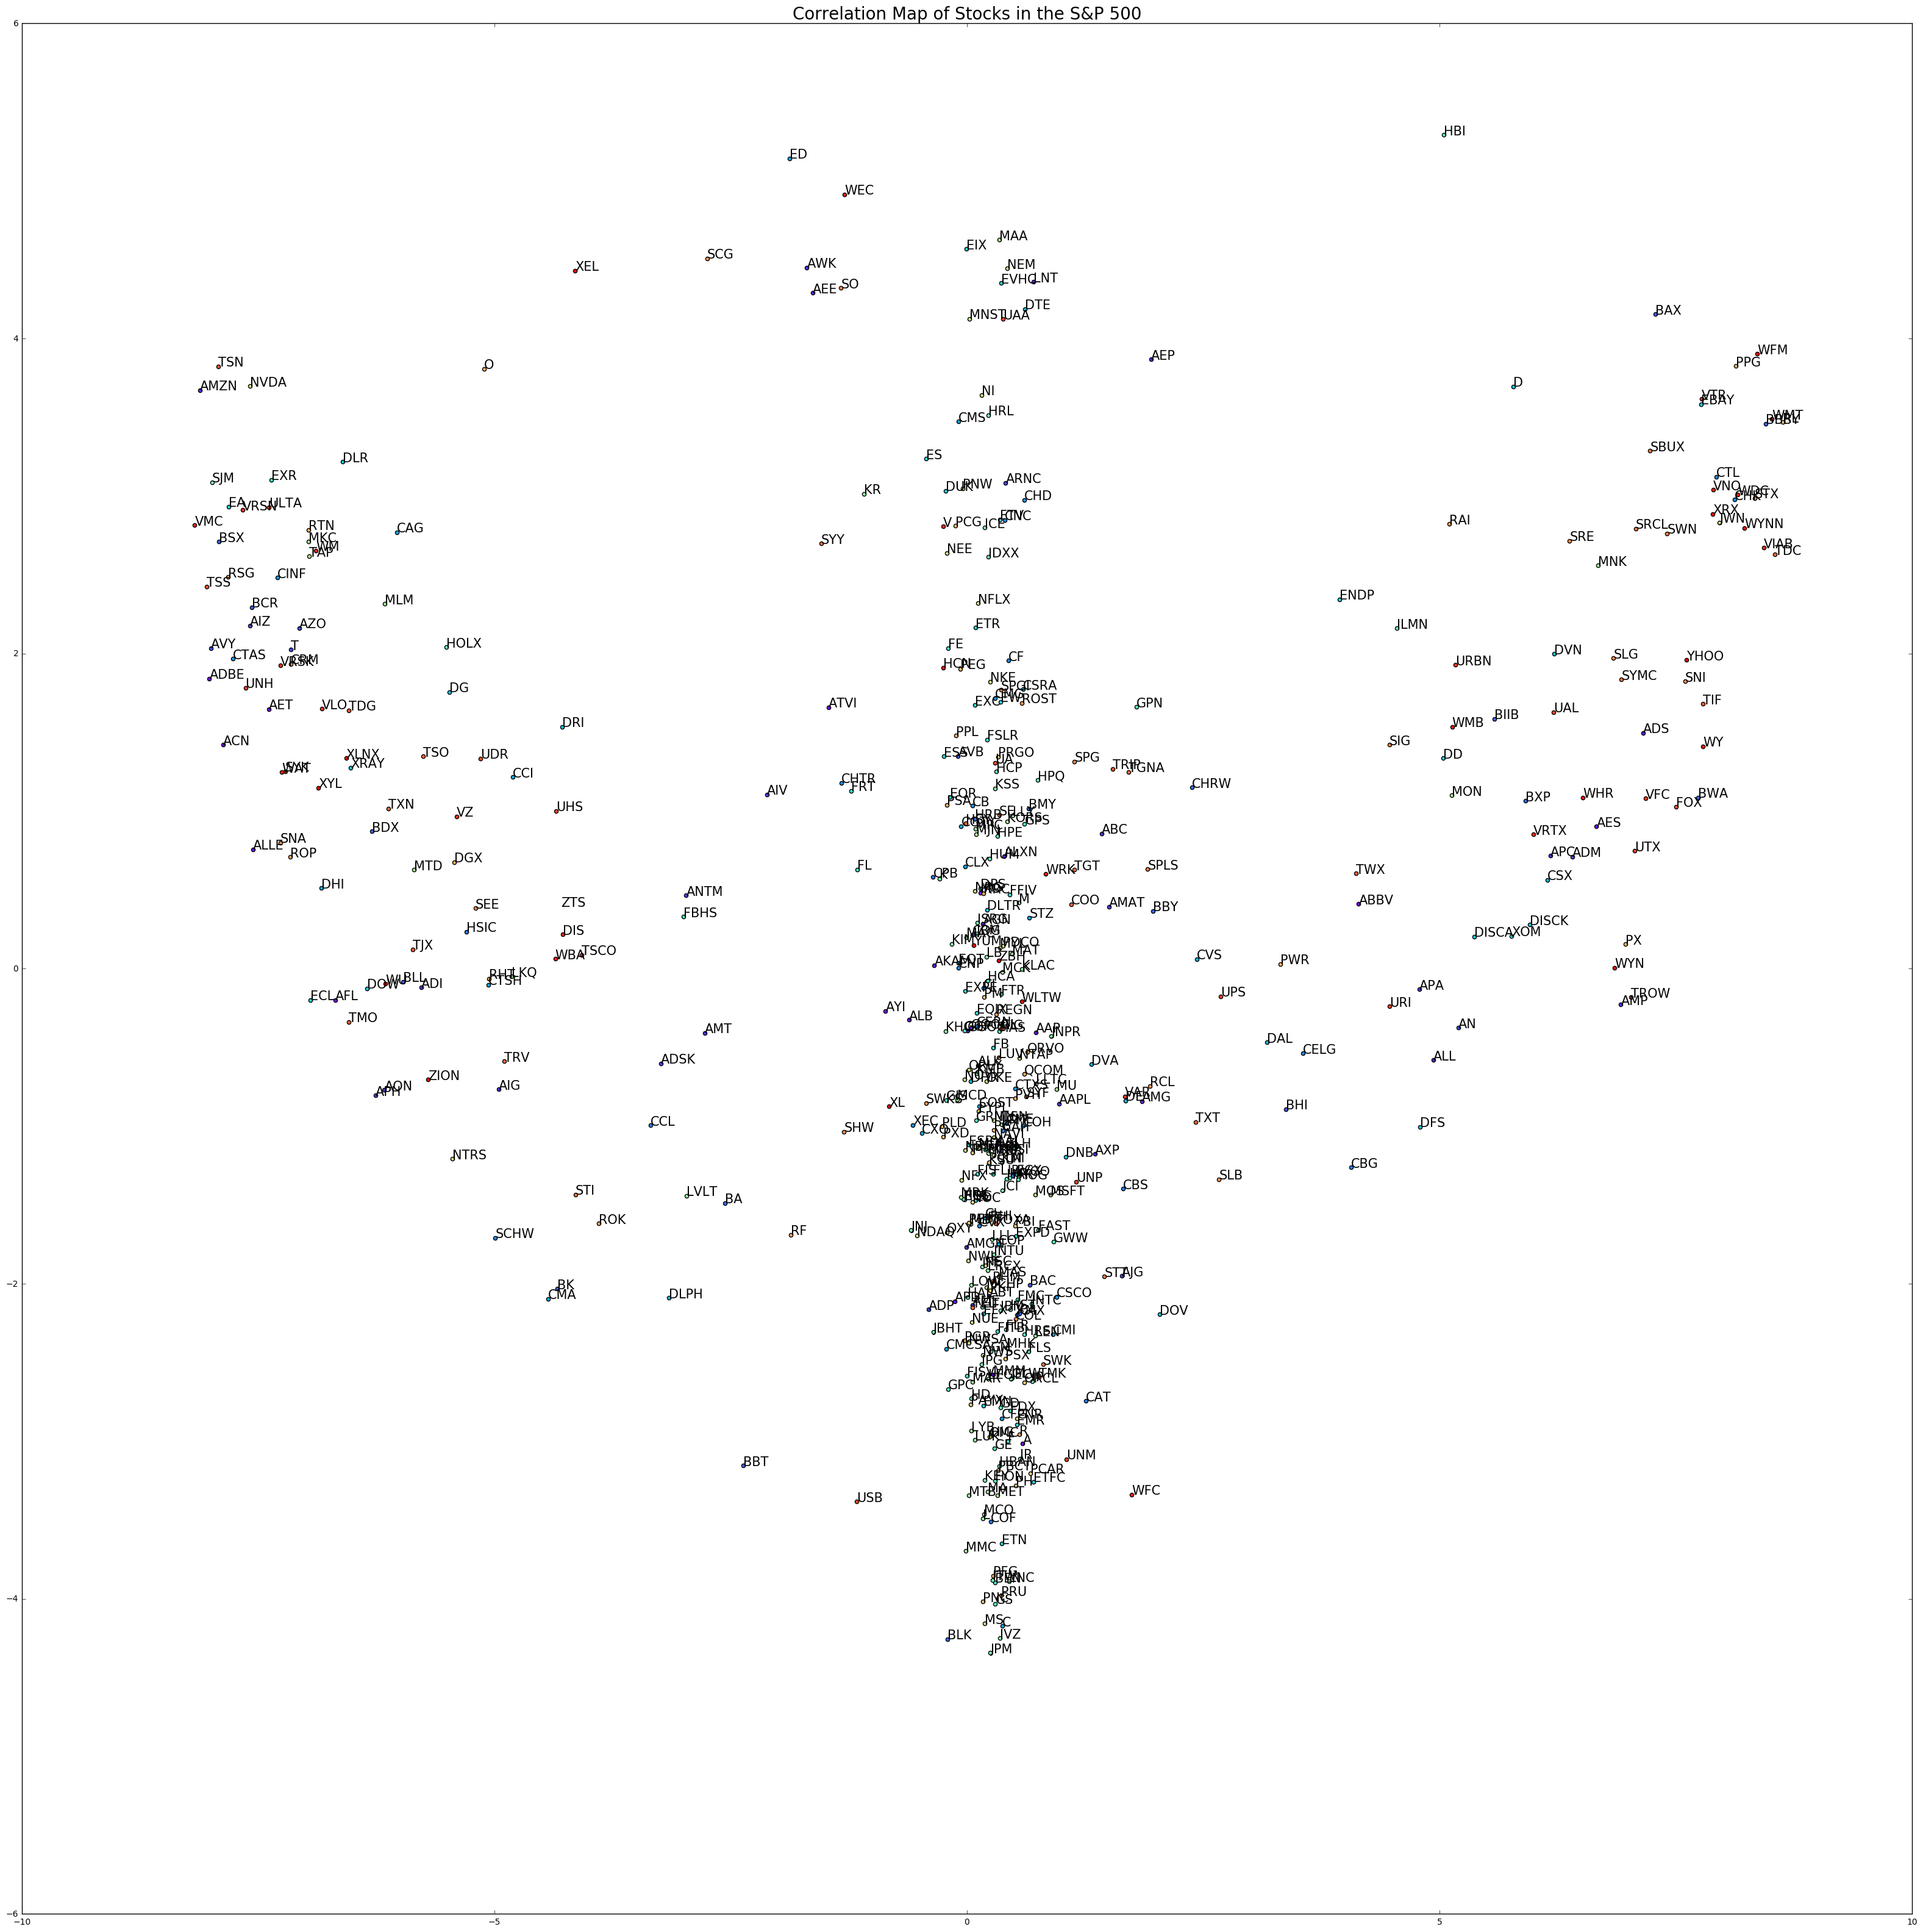

In [22]:
fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(111)
colors = cm.rainbow(np.linspace(0, 1, len(labels)-1))
for c, i, target_name in zip(colors, [i for i in range(0, len(labels)-1)], labels):
    plt.scatter(data_r[i, 0], data_r[i, 1], c=c, alpha = 1)
    plt.legend()

for i, txt in enumerate(labels):
    plt.annotate(txt[5:], (data_r[i, 0], data_r[i, 1]), fontsize=15)
    
plt.title("Correlation Map of Stocks in the S&P 500", fontsize=20)

plt.show()

In [26]:
# For a single company narrowing it down to companies that are either highly or very uncorrelated to it. 
def high_low_corr(company):
     return corr[corr['{}'.format(company)] > 0.8 & corr['{}'.format(company) < -0.8]]


In [48]:
np.corrcoef(np.array(stock['Avrg_GOOG']), np.array(stock['Avrg_YHOO']))

array([[ 1.        , -0.24014185],
       [-0.24014185,  1.        ]])

In [43]:
a = np.array([x for x in range(0, 10, 2)])
b = np.array([ y for y in range(0, 10, 2)])

In [106]:
def threshold(company):
    lst = []
    for x in range(0, 10, 1):
        i = float(x)/10
        if len(corr.loc[corr['{}'.format(company)] > i]) < 80 and len(corr.loc[corr['{}'.format(company)] > i]) > 10:
            lst.append(i)
        
    return sorted(lst)[0]

0.00210681880334


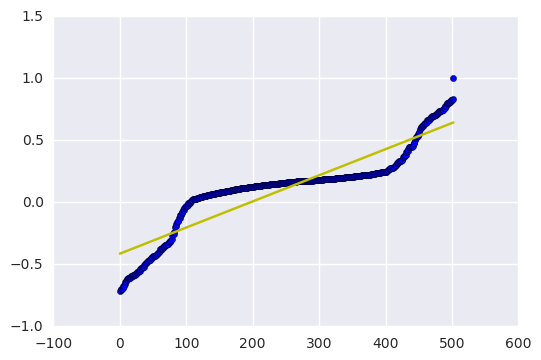

In [167]:
x = [x for x in range(0, len(corr['Avrg_YHOO']))]
y = sorted([i for i in corr['Avrg_YHOO']])

plt.scatter(np.array(x), np.array(y))
m, b = np.polyfit(x, y, 1)

x_ = [m*c + b for c in x]

plt.plot(np.array(x), np.array(x_), '-', c='y')
print m

In [140]:
lr = LinearRegression()
x = [x for x in range(0, len(corr['Avrg_YHOO']))]
y = [i for i in corr['Avrg_YHOO']]

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=10)

In [150]:
x_train.

AttributeError: 'list' object has no attribute 'shape'

numpy.ndarray

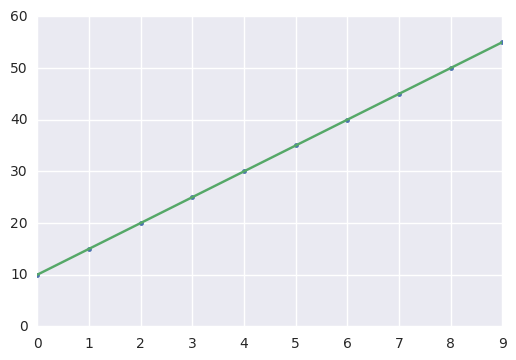

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# sample data
x = np.arange(10)
y1 = 5*x + 10 

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

In [169]:
corr['Avrg_GOOG'].head()

Avrg_MMM     0.326467
Avrg_ABT     0.376447
Avrg_ABBV    0.185860
Avrg_ACN     0.168877
Avrg_ATVI    0.281720
Name: Avrg_GOOG, dtype: float64

In [189]:
a = pd.DataFrame(corr['Avrg_GOOG'])

In [210]:
x_coord = []
y_coord = []
for i in a.values:
    i_ = float(math.fabs(i))
    x = np.random.randint((-i_)*10000, i_*10000)/float(10000)
    y = (i*i - x*x)**(1/2.0)
    
    
    
    x_coord.append(x)
    y_coord.append(y)
    
a['x_values'], a['y_values'] = x_coord, y_coord
    

In [270]:
def circle(r, color):
    return plt.Circle((0, 0), r, color='{}'.format(color), fill=False, lw=7, alpha=0.4)

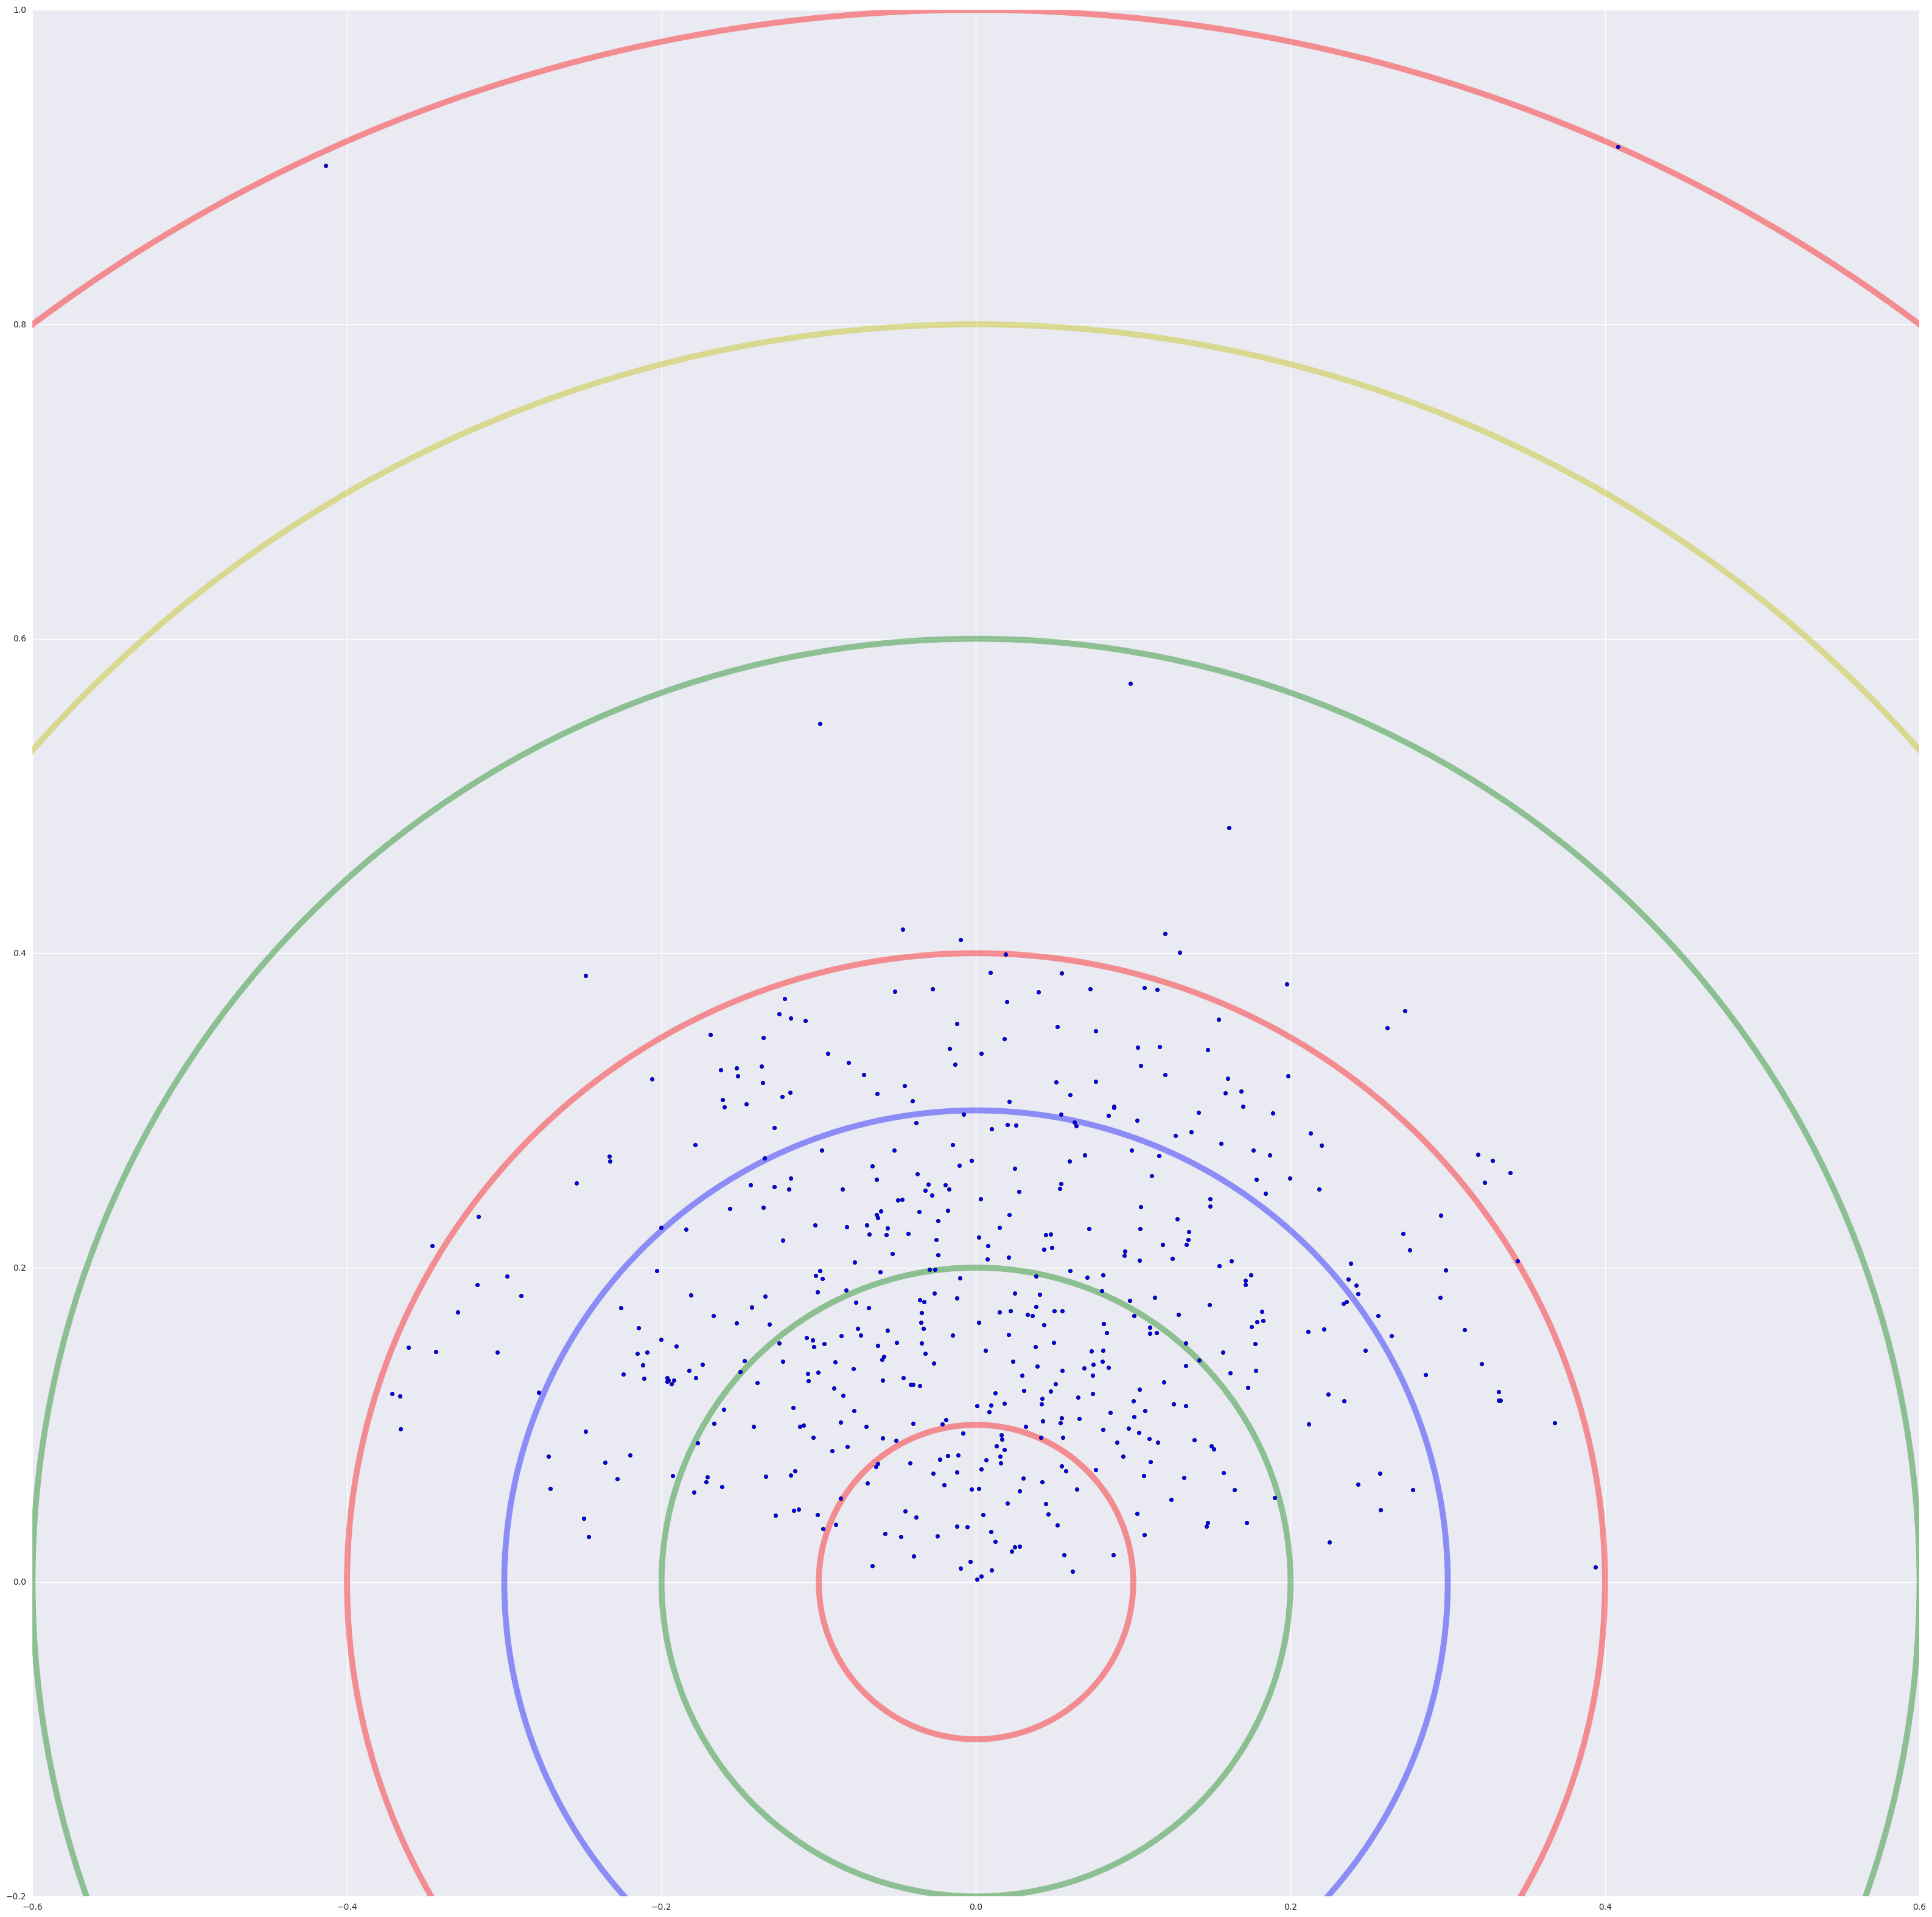

In [274]:
plt.figure(figsize=(40, 40))
scatter = plt.scatter(a['x_values'], a['y_values'])

circle1 = circle(0.1, 'r')
circle2 = circle(0.2, 'g')
circle3 = circle(0.3, 'b')
circle4 = circle(0.4, 'r')
circle5 = circle(0.6, 'g')
circle6 = circle(0.8, 'y')
circle7 = circle(1, 'r')

ax.legend(loc="upper right")

fig = plt.gcf()
ax = fig.gca()

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(scatter)




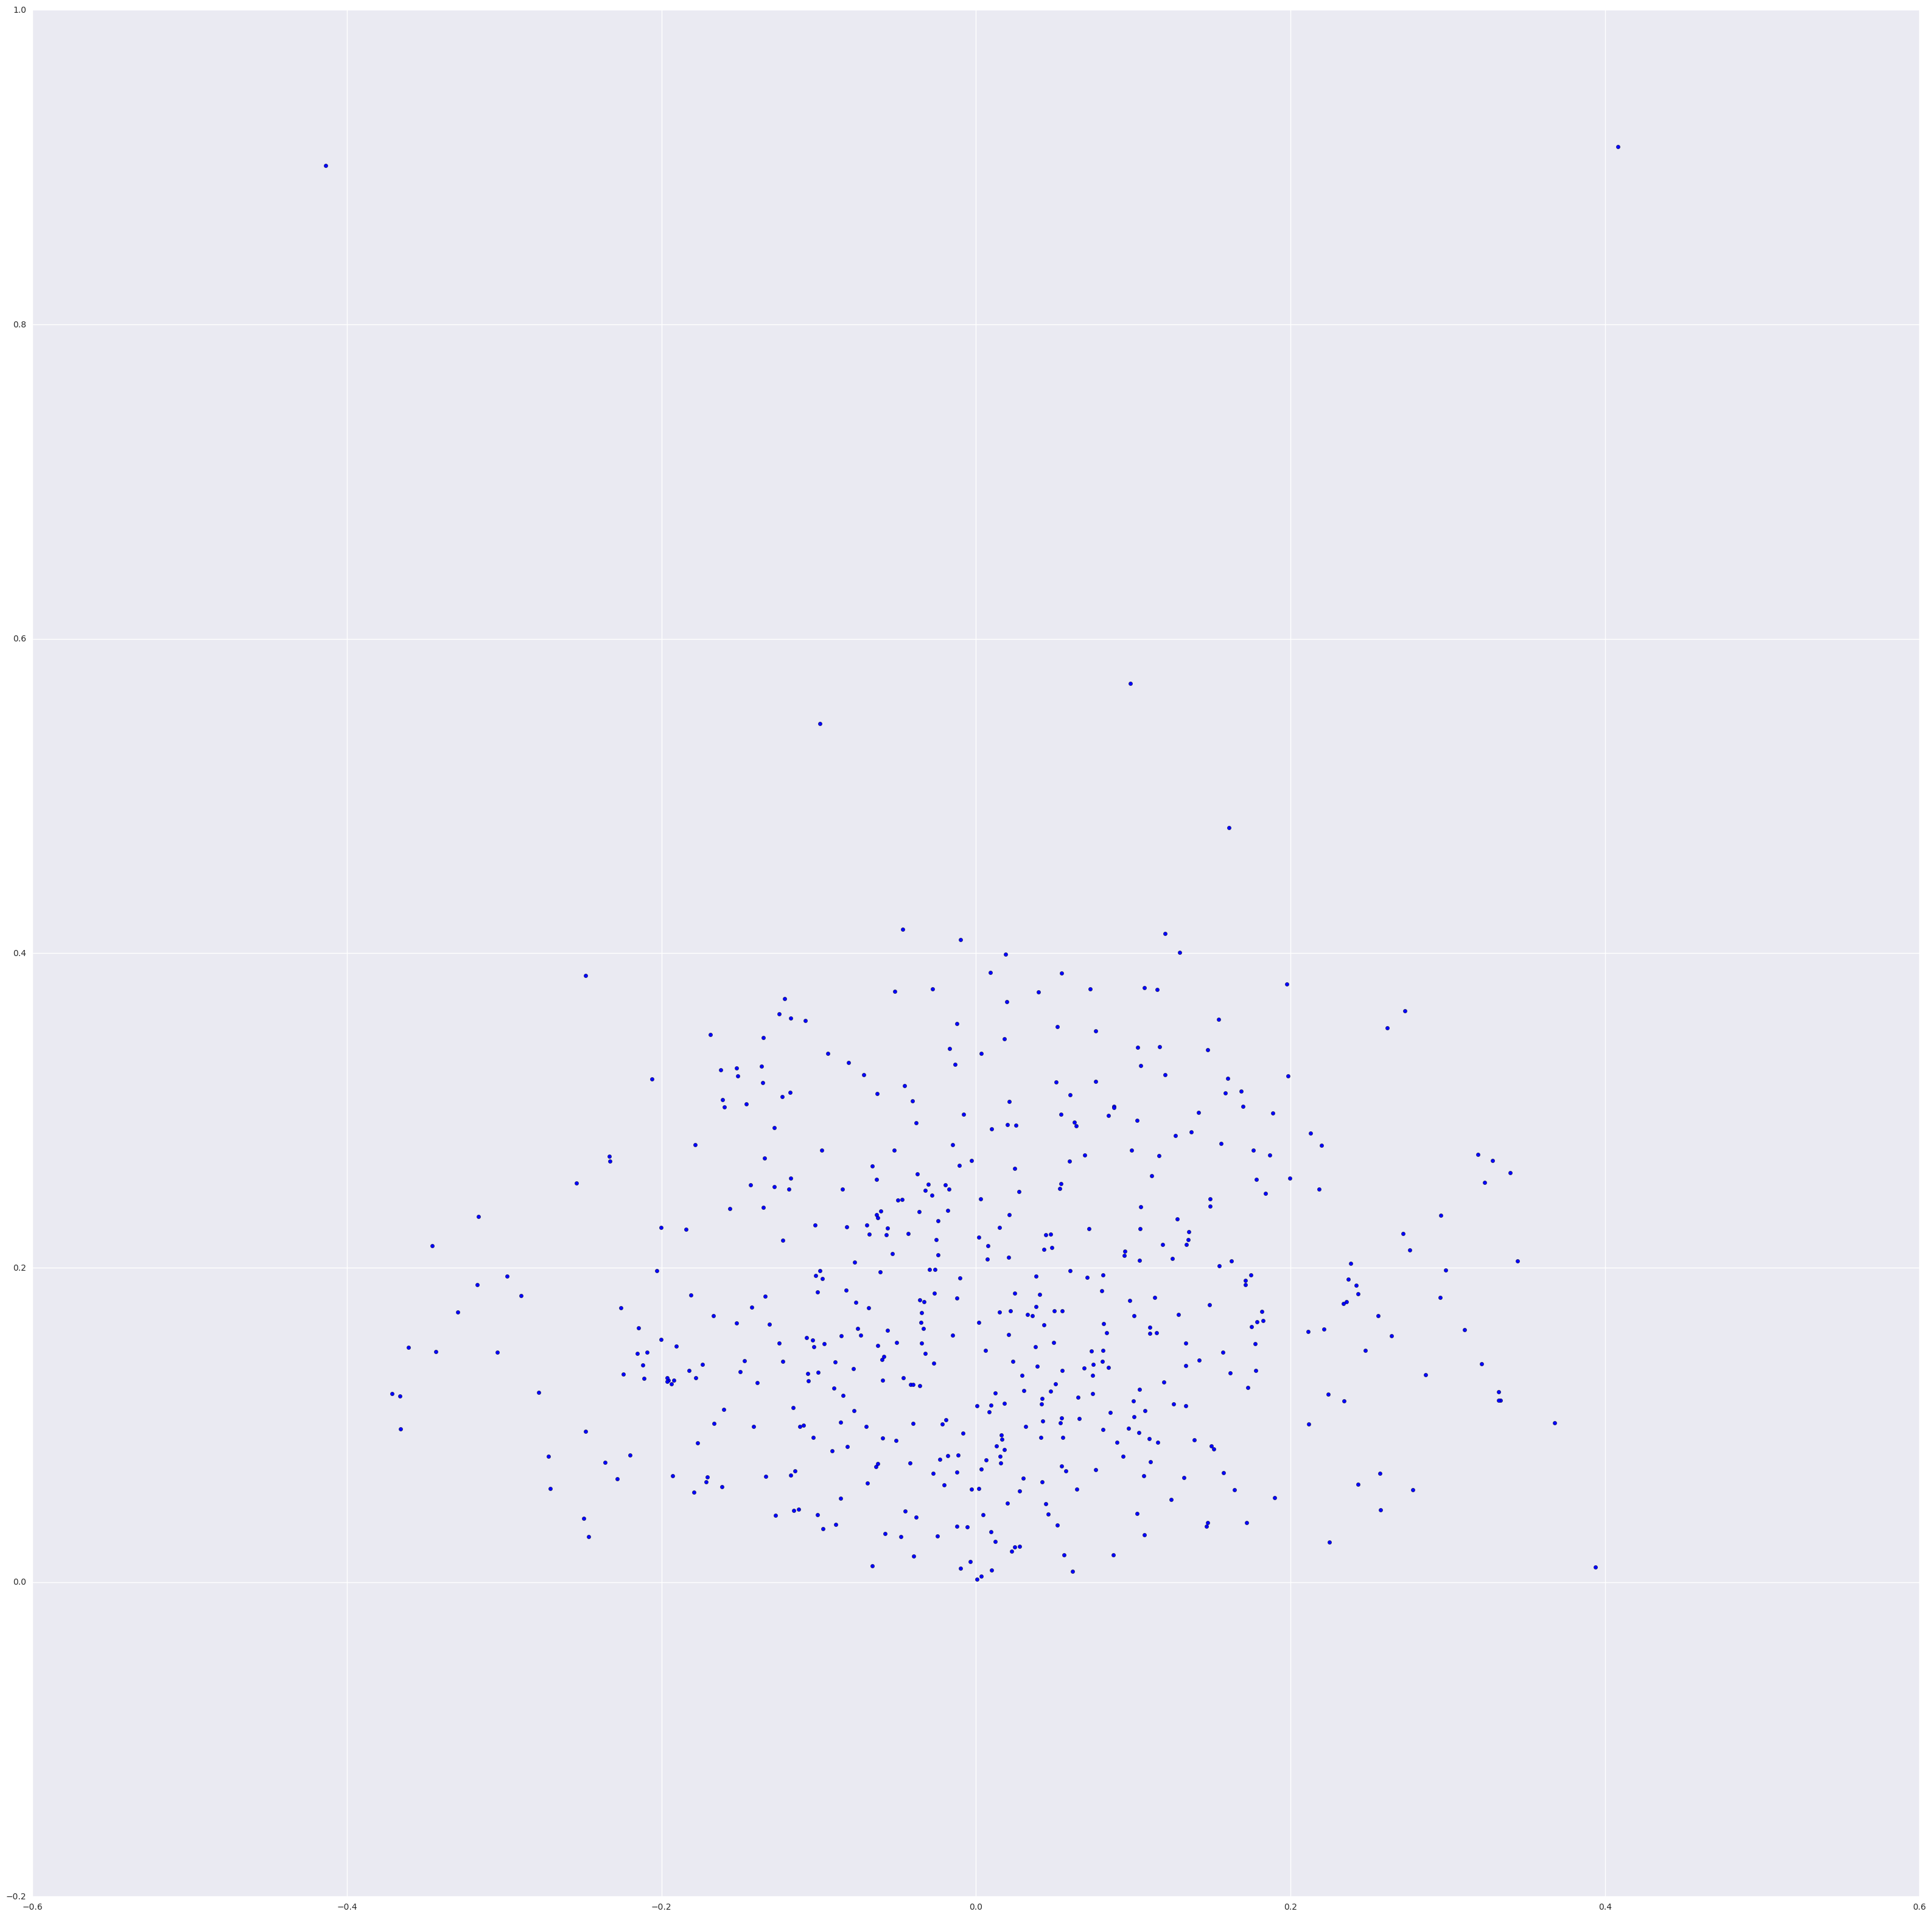

In [214]:
plt.figure(figsize=(40, 40))
plt.scatter(a['x_values'], a['y_values'])
plt.plot()

In [219]:
a.head()

,Avrg_GOOG,x_values,y_values
Avrg_MMM,0.326467,0.1765,[0.274642006298]
Avrg_ABT,0.376447,0.2956,[0.233094906366]
Avrg_ABBV,0.185860,-0.1041,[0.153971540909]
Avrg_ACN,0.168877,-0.0349,[0.165231333787]
Avrg_ATVI,0.281720,0.1490,[0.239092340235]


In [201]:
np.random.randint(-3000, 3000)/float(1000)

2.335

In [227]:
py.sign_in('am.short7', 'E0X28xzbcbrchyKwIOpa')

In [231]:
data = [
    go.Contour(
        z = [i for i in a['Avrg_GOOG'].values],
        x = [z for z in a['x_values'].values],
        y = [w for w in a['y_values'].values],
        contours=dict(
            start=0, 
            end=1,
            size=0.1
        )
)]

In [232]:
py.iplot(data)

In [276]:
cd desktop

/Users/ashort/Desktop
